In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn

In [155]:
pn.extension('tabulator')

In [156]:
df_approach = pd.read_csv('./datasets/approach.csv')
df_asteroid = pd.read_csv('./datasets/asteroid.csv')

In [157]:
# 1. **Classificazione degli asteroidi in base al diametro**
def assign_size_category(diameter):
    if diameter < 0.14:
        return 'Small'
    elif 0.14 <= diameter < 1:
        return 'Medium'
    else:
        return 'Large'

df_asteroid['size_category'] = df_asteroid['estimated_diameter_km_max'].apply(assign_size_category)

In [158]:
# 2. **Calcolo della percentuale di asteroidi pericolosi per categoria di dimensione**
per_category = df_asteroid.groupby('size_category')['is_potentially_hazardous_asteroid'].mean() * 100
per_category.head()

size_category
Large     19.322599
Medium    23.536928
Small      0.000000
Name: is_potentially_hazardous_asteroid, dtype: float64

In [159]:
# Calcolo il numero di asteroidi per ogni categoria
per_category_size = df_asteroid.groupby('size_category').size()
per_category.head()

size_category
Large     19.322599
Medium    23.536928
Small      0.000000
Name: is_potentially_hazardous_asteroid, dtype: float64

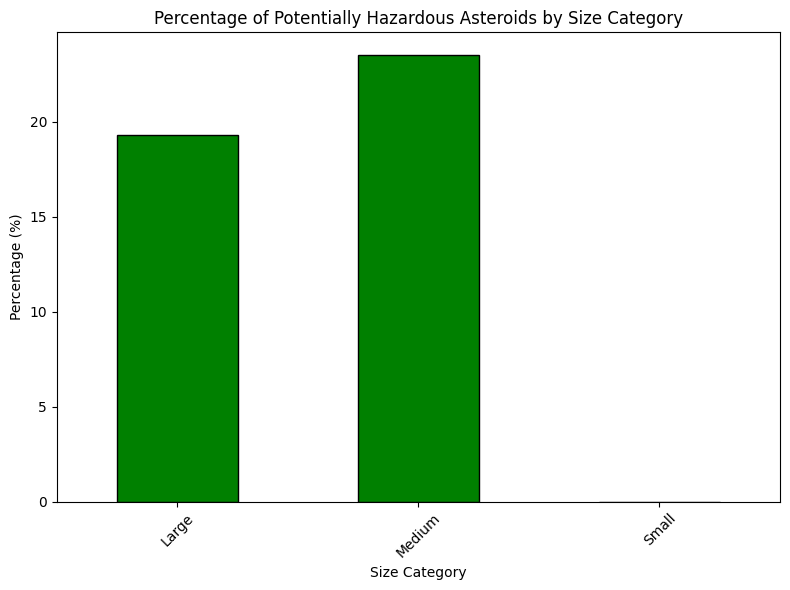

In [160]:
# 3. **Visualizzazione della percentuale di asteroidi pericolosi per categoria di dimensione**
plt.figure(figsize=(8, 6))
per_category.plot(kind='bar', color='green', edgecolor='black')
plt.title('Percentage of Potentially Hazardous Asteroids by Size Category')
plt.xlabel('Size Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [161]:
# 4. **Elabora gli approcci degli asteroidi nel tempo**
df_approach['close_approach_date'] = pd.to_datetime(df_approach['close_approach_date'])
neos_per_year = df_approach.groupby(df_approach['close_approach_date'].dt.year).size()
neos_per_year

close_approach_date
1899      1
1900    923
1901    896
1902    886
1903    922
       ... 
2197    891
2198    869
2199    847
2200    835
2201      1
Length: 303, dtype: int64

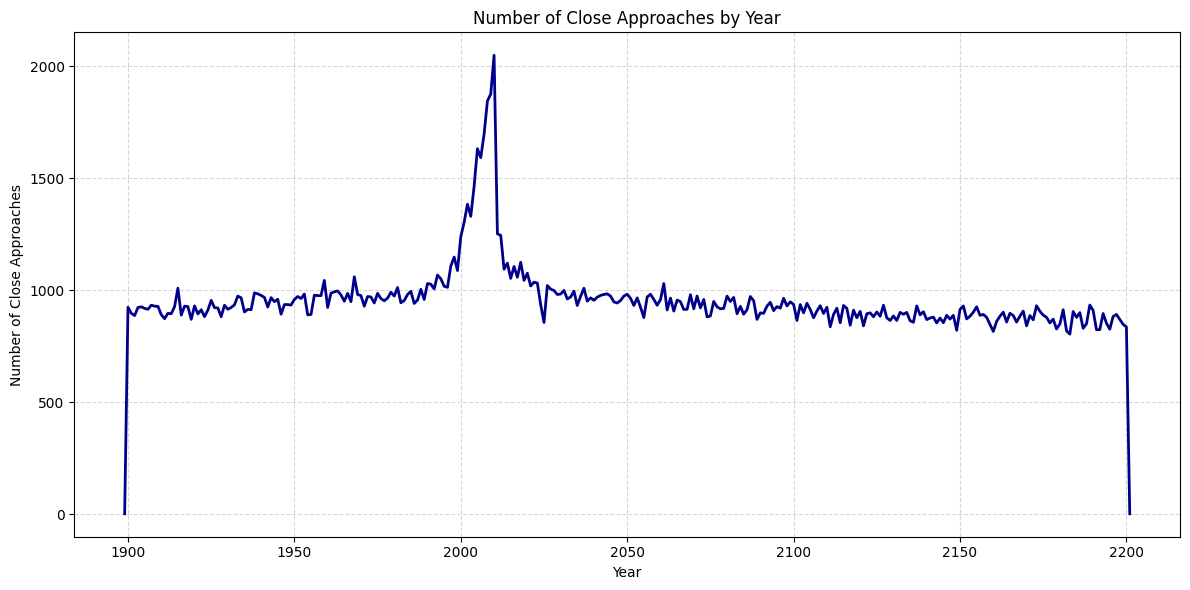

In [162]:
# 5. **Visualizzazione del numero di approcci per anno**
plt.figure(figsize=(12, 6))
neos_per_year.plot(kind='line', color='darkblue', linewidth=2)
plt.title('Number of Close Approaches by Year')
plt.xlabel('Year')
plt.ylabel('Number of Close Approaches')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [163]:
# 6. **Calcolo della percentuale di asteroidi pericolosi per anno senza duplicati**
merge = pd.merge(df_approach, df_asteroid, how='left', left_on='asteroid_id', right_on='id')
merge['year'] = merge['close_approach_date'].dt.year
unique_asteroids_per_year = merge.drop_duplicates(subset=['asteroid_id', 'year'])
haz_per_year = unique_asteroids_per_year.groupby('year')['is_potentially_hazardous_asteroid'].mean() * 100
haz_per_year.head()

year
1899    100.000000
1900     27.969349
1901     30.412371
1902     25.733333
1903     28.350515
Name: is_potentially_hazardous_asteroid, dtype: float64

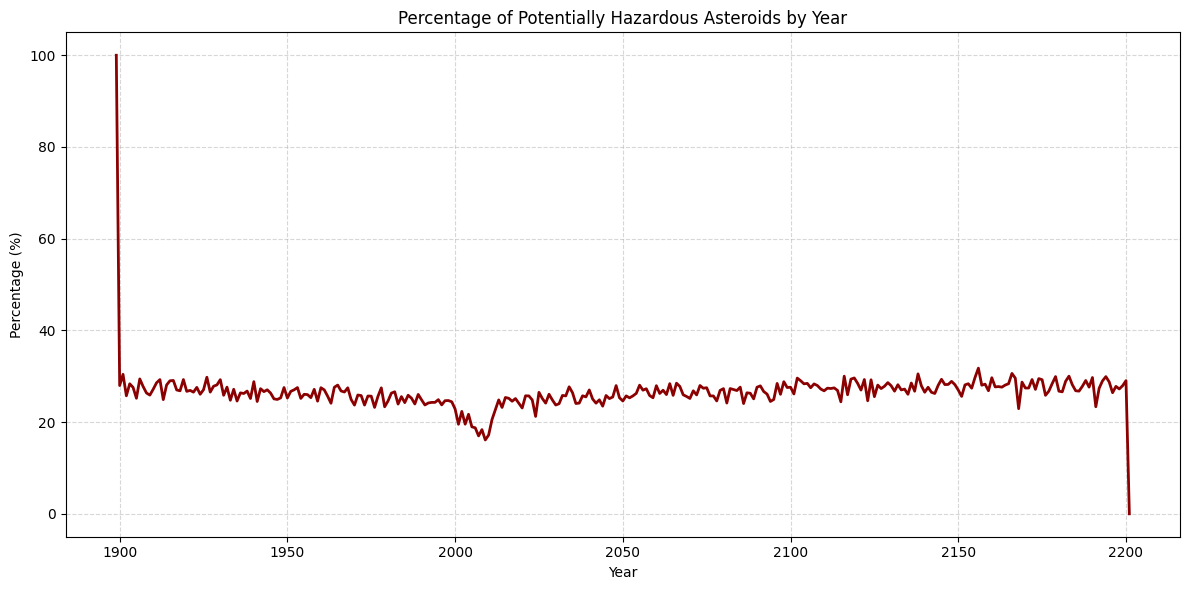

In [164]:
# 7. **Visualizzazione della percentuale di asteroidi pericolosi per anno**
plt.figure(figsize=(12, 6))
haz_per_year.plot(kind='line', color='darkred', linewidth=2)
plt.title('Percentage of Potentially Hazardous Asteroids by Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

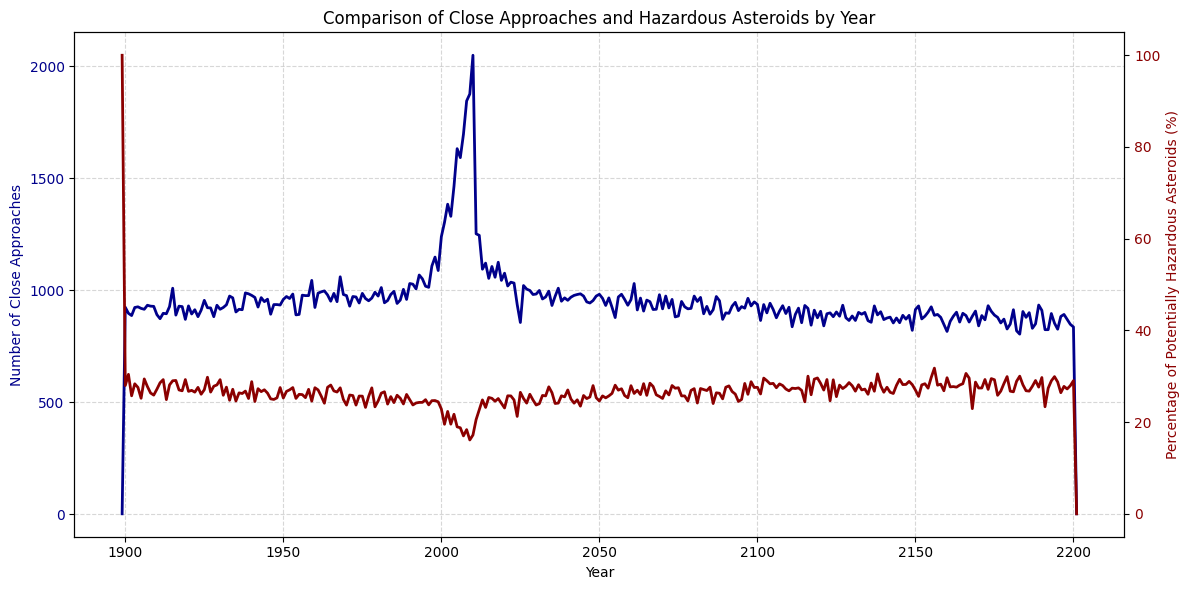

In [165]:
# 8. **Creazione del grafico con due assi Y per sovrapporre i due grafici**

fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico del numero di approcci per anno (primo asse Y)
ax1.plot(neos_per_year.index, neos_per_year, color='darkblue', linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Close Approaches', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')
ax1.grid(True, linestyle='--', alpha=0.5)

# Creazione del secondo asse Y
ax2 = ax1.twinx()

# Grafico della percentuale di asteroidi pericolosi per anno (secondo asse Y)
ax2.plot(haz_per_year.index, haz_per_year, color='darkred', linewidth=2)
ax2.set_ylabel('Percentage of Potentially Hazardous Asteroids (%)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Titolo del grafico
plt.title('Comparison of Close Approaches and Hazardous Asteroids by Year')

# Layout
plt.tight_layout()
plt.show()